In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)
df_store = pd.read_csv('D:/week4 data/store.csv', low_memory=False)

# Merge the datasets on the 'Store' column
df_merged = pd.merge(df_train, df_store, on='Store')

# Convert 'Date' column to datetime
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Handle NaN values for numeric columns
numeric_cols = df_merged.select_dtypes(include=['number']).columns
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].mean())

# Extract new features from 'Date' column
df_merged['Weekday'] = df_merged['Date'].dt.weekday
df_merged['Is_Weekend'] = df_merged['Weekday'] >= 5
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Year'] = df_merged['Date'].dt.year

# Define holidays (Example dates for Christmas and New Year)
holidays = pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25', '2014-01-01', '2015-01-01'])

# Calculate number of days to the next holiday
df_merged['Days_to_Holiday'] = df_merged['Date'].apply(lambda x: (holidays - x).min().days)

# Calculate number of days after the last holiday
df_merged['Days_After_Holiday'] = df_merged['Date'].apply(lambda x: (x - holidays[holidays <= x].max()).days)

# Identify the beginning, mid, and end of the month
df_merged['Month_Period'] = pd.cut(df_merged['Date'].dt.day, bins=[0, 10, 20, 31], labels=['Beginning', 'Mid', 'End'])

# Convert categorical columns to numeric using one-hot encoding
df_merged = pd.get_dummies(df_merged, columns=['Month_Period', 'StoreType', 'Assortment'], drop_first=True)

# Select features for scaling
features_to_scale = df_merged[['Sales', 'Customers', 'CompetitionDistance', 'Days_to_Holiday', 'Days_After_Holiday']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled features to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Combine scaled features with the rest of the dataset
df_preprocessed = df_merged.drop(columns=features_to_scale.columns).reset_index(drop=True)
df_preprocessed = pd.concat([df_preprocessed, scaled_df], axis=1)

print("Preprocessed Data:")
print(df_preprocessed.head())

# Save the preprocessed data to a CSV file
df_preprocessed.to_csv('D:/week4 data/preprocessed_data.csv', index=False)




Preprocessed Data:
   Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday  \
0      1          5 2015-07-31     1      1            0              1   
1      2          5 2015-07-31     1      1            0              1   
2      3          5 2015-07-31     1      1            0              1   
3      4          5 2015-07-31     1      1            0              1   
4      5          5 2015-07-31     1      1            0              1   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  ...  \
0                        9.0                    2008.0       0  ...   
1                       11.0                    2007.0       1  ...   
2                       12.0                    2006.0       1  ...   
3                        9.0                    2009.0       0  ...   
4                        4.0                    2015.0       0  ...   

   StoreType_b  StoreType_c StoreType_d  Assortment_b  Assortment_c     Sales  \
0        False        

C:\Users\Robel\AppData\Local\Temp\ipykernel_17900\2667677.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


Model saved successfully!
Mean Squared Error: 0.01345760240444456
R^2 Score: 0.9865122581095852


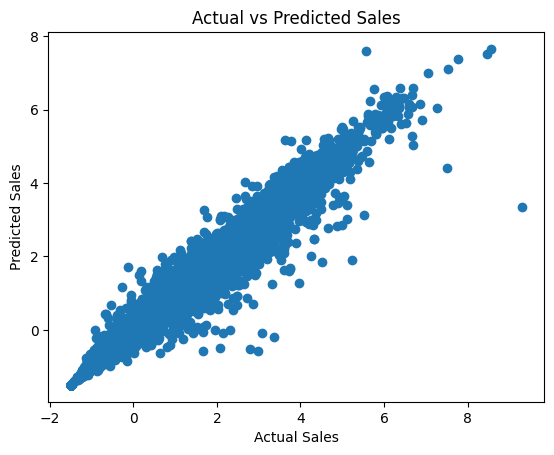

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')

# Drop non-numeric columns
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, 'D:/week4 data/random_forest_pipeline.pkl')
print("Model saved successfully!")

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualize the results (Optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


C:\Users\Robel\AppData\Local\Temp\ipykernel_17900\1735671570.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


Model saved successfully!
Mean Absolute Error: 0.0693103521899023


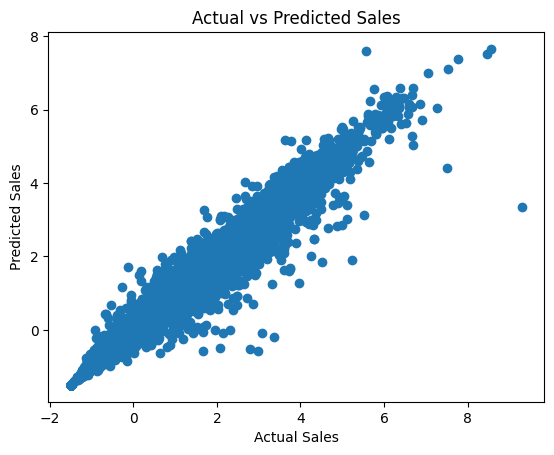

In [3]:
from sklearn.metrics import mean_absolute_error

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, 'D:/week4 data/random_forest_pipeline.pkl')
print("Model saved successfully!")

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualize the results (Optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

C:\Users\Robel\AppData\Local\Temp\ipykernel_11548\168593351.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


Optimized and compressed model saved successfully!
Mean Absolute Error: 0.1613255783116338


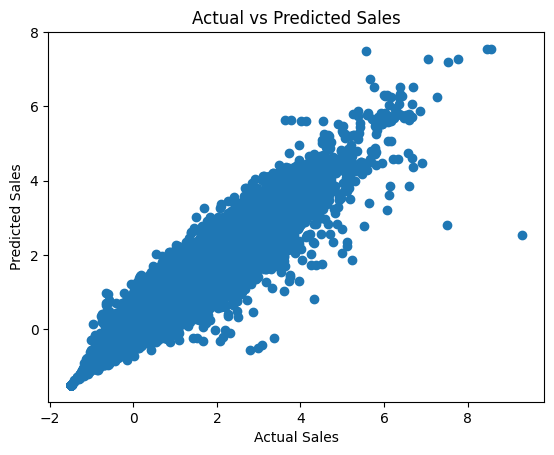

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with optimized Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=42))  # Random Forest Regressor with optimizations
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file with compression
joblib.dump(pipeline, 'D:/week4 data/random_forest_pipeline_compressed.pkl', compress=3)
print("Optimized and compressed model saved successfully!")

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualize the results (Optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


C:\Users\Robel\AppData\Local\Temp\ipykernel_14452\3498640524.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


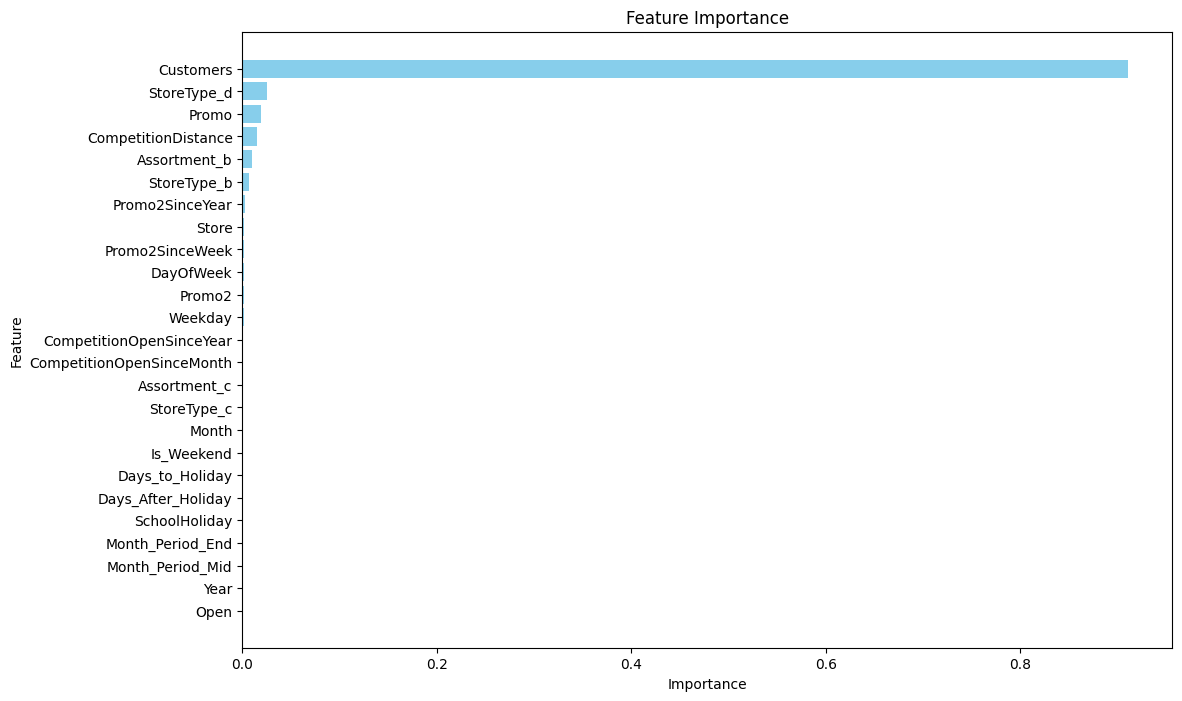

Feature Importance:
                      Feature    Importance
21                  Customers  9.109318e-01
18                StoreType_d  2.527614e-02
3                       Promo  1.864415e-02
22        CompetitionDistance  1.488601e-02
19               Assortment_b  1.030011e-02
16                StoreType_b  6.420899e-03
9             Promo2SinceYear  2.569381e-03
0                       Store  2.067707e-03
8             Promo2SinceWeek  1.796037e-03
1                   DayOfWeek  1.436743e-03
7                      Promo2  1.431415e-03
10                    Weekday  1.315641e-03
6    CompetitionOpenSinceYear  1.048956e-03
5   CompetitionOpenSinceMonth  7.499393e-04
20               Assortment_c  4.174625e-04
17                StoreType_c  2.398960e-04
12                      Month  1.687342e-04
11                 Is_Weekend  1.279667e-04
23            Days_to_Holiday  1.213784e-04
24         Days_After_Holiday  4.372208e-05
4               SchoolHoliday  2.407336e-06
15          

In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the saved model
pipeline = joblib.load('D:/week4 data/random_forest_pipeline_compressed.pkl')

# Extract the Random Forest model from the pipeline
rf_model = pipeline.named_steps['regressor']

# Get feature importance
feature_importance = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print("Feature Importance:")
print(importance_df)


C:\Users\Robel\AppData\Local\Temp\ipykernel_12104\3407862077.py:13: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


Simplified model serialized and saved successfully with compression and timestamp!


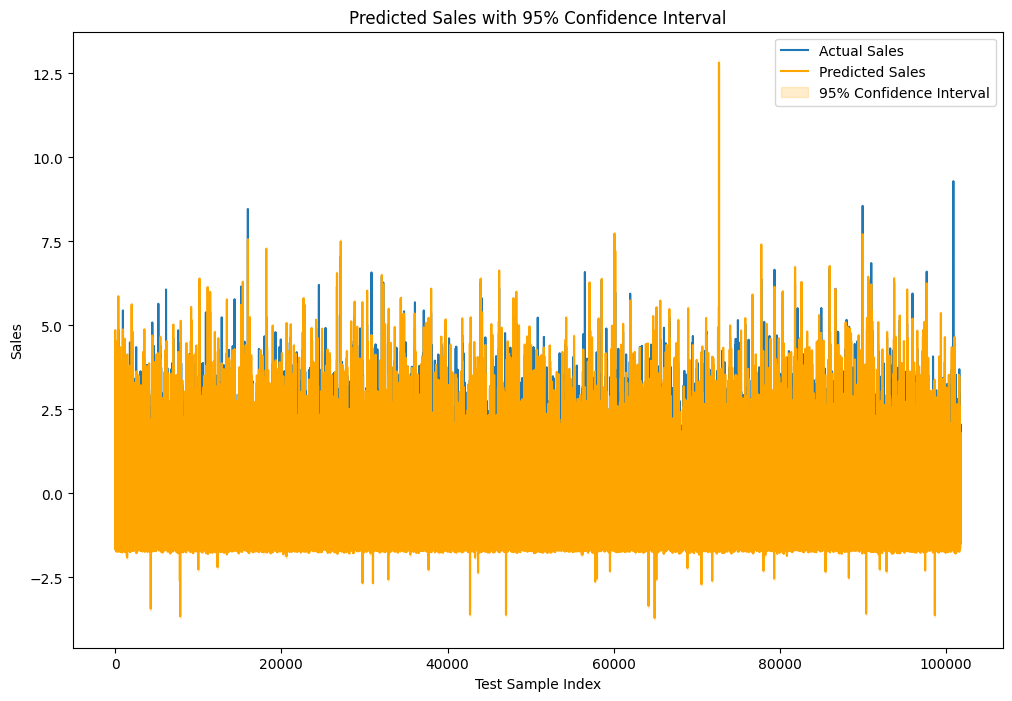

In [5]:
import joblib
import pandas as pd
import numpy as np  # Import numpy
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Simpler model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])
df_preprocessed = df_preprocessed.fillna(df_preprocessed.mean())

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # Smaller test size

# Create a simpler pipeline using Linear Regression
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit the model
pipeline.fit(X_train, y_train)

# Get the current timestamp
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Serialize the model with compression and the timestamp
joblib.dump(pipeline, f'D:/week4 data/linear_regression_pipeline_{timestamp}.pkl', compress=1)  # Lower compression level for speed

print("Simplified model serialized and saved successfully with compression and timestamp!")

# For Confidence Interval Estimation:

# Use a smaller subset of data for testing
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.sample(frac=0.1, random_state=42)

# Number of bootstrap samples
n_bootstrap = 50

# Initialize lists to store results
predictions_list = []

for i in range(n_bootstrap):
    # Resample the training data with replacement
    X_resampled, y_resampled = resample(X_train_subset, y_train_subset)

    # Fit the model on the resampled data
    pipeline.fit(X_resampled, y_resampled)

    # Make predictions on the test set
    y_pred_bootstrap = pipeline.predict(X_test)
    
    # Store the predictions
    predictions_list.append(y_pred_bootstrap)

# Convert list to array for easier manipulation
predictions_array = np.array(predictions_list)

# Calculate the mean and confidence intervals
mean_predictions = np.mean(predictions_array, axis=0)
lower_bound = np.percentile(predictions_array, 2.5, axis=0)
upper_bound = np.percentile(predictions_array, 97.5, axis=0)

# Visualize the confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(y_test.reset_index(drop=True), label='Actual Sales')
plt.plot(mean_predictions, label='Predicted Sales', color='orange')
plt.fill_between(np.arange(len(y_test)), lower_bound, upper_bound, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.title('Predicted Sales with 95% Confidence Interval')
plt.show()


In [1]:
import joblib
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Simpler model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')
df_preprocessed = df_preprocessed.drop(columns=['Date', 'StateHoliday', 'PromoInterval'])
df_preprocessed = df_preprocessed.fillna(df_preprocessed.mean())

# Define features and target variable
X = df_preprocessed.drop(columns=['Sales'])
y = df_preprocessed['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # Smaller test size

# Create a simpler pipeline using Linear Regression
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit the model
pipeline.fit(X_train, y_train)

# Get the current timestamp
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Serialize the model with compression and the timestamp
joblib.dump(pipeline, f'D:/week4 data/linear_regression_pipeline_{timestamp}.pkl', compress=1)  # Lower compression level for speed

print("Simplified model serialized and saved successfully with compression and timestamp!")


C:\Users\Robel\AppData\Local\Temp\ipykernel_12104\3425892664.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessed = pd.read_csv('D:/week4 data/preprocessed_data.csv')


Simplified model serialized and saved successfully with compression and timestamp!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Rossmann Store Sales dataset
df = pd.read_csv('rossmann-store-sales.csv')


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/week4 data/preprocessed_data.csv')

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Extract Store's sales data
sales_data = df[df['Store'] == 1]['Sales']  # Example for Store 1


C:\Users\Robel\AppData\Local\Temp\ipykernel_12444\3578004501.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/week4 data/preprocessed_data.csv')


In [6]:
# Downsample to weekly average
sales_data_downsampled = sales_data.resample('W').mean()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(sales_data_downsampled.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation
if result[1] > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")


ADF Statistic: -5.374474936296228
p-value: 3.831417414135321e-06
The data is stationary.


In [8]:
sales_data_diff = sales_data.diff().dropna()

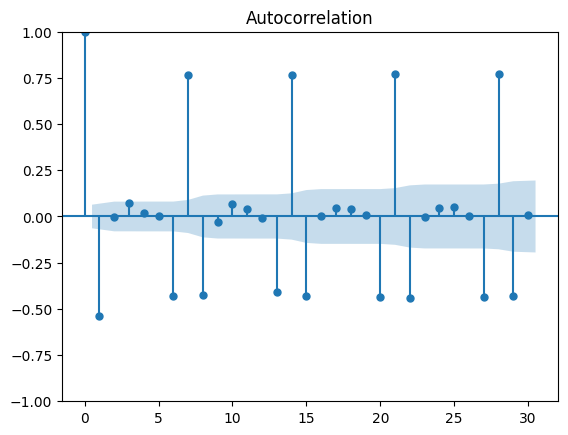

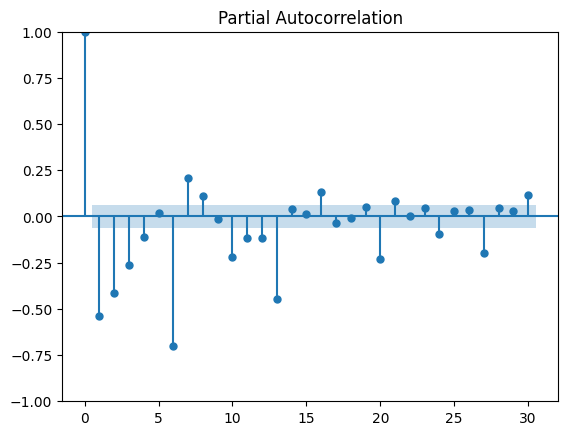

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(sales_data_diff)
plt.show()

plot_pacf(sales_data_diff)
plt.show()


In [12]:
def create_lagged_features(data, n_lags=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, n_lags+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

n_lags = 3  # Example
supervised_data = create_lagged_features(sales_data_diff, n_lags)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

In [18]:
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
# Load the dataset
df = pd.read_csv('D:/week4 data/preprocessed_data.csv')

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Extract Store's sales data
sales_data = df[df['Store'] == 1]['Sales']  # Example for Store 1

# Differencing the data if non-stationary
sales_data_diff = sales_data.diff().dropna()

# Create supervised learning data
def create_lagged_features(data, n_lags=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, n_lags+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

n_lags = 3  # Example
supervised_data = create_lagged_features(sales_data_diff, n_lags)

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

# Prepare data for LSTM
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

C:\Users\Robel\AppData\Local\Temp\ipykernel_12444\367311408.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/week4 data/preprocessed_data.csv')


In [26]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq), 1, -1))
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

input_size = X.shape[1]
hidden_layer_size = 50
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, output_size)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

input_size = X.shape[1]
hidden_layer_size = 50
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, output_size)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Ensure data has the correct shape
X = X.view(X.size(0), 1, X.size(1))

epochs = 20

for i in range(epochs):
    for seq, labels in zip(X, y):
        optimizer.zero_grad()
        y_pred = model(seq.unsqueeze(0))
        single_loss = loss_function(y_pred, labels.unsqueeze(0))
        single_loss.backward()
        optimizer.step()

    if i % 5 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 0.2608194053173065
Epoch 5 Loss: 0.1845470517873764
Epoch 10 Loss: 0.17571909725666046
Epoch 15 Loss: 0.16855411231517792


In [29]:
model.eval()
predictions = []

for seq in X:
    with torch.no_grad():
        predictions.append(model(seq.unsqueeze(0)).item())

# Inverse transform predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions_inv = scaler.inverse_transform(np.concatenate((scaled_data[:, :-1], predictions), axis=1))[:, -1]

# Add predictions to the original DataFrame
df['Predicted_Sales'] = np.nan
df.iloc[n_lags:len(predictions) + n_lags, df.columns.get_loc('Predicted_Sales')] = predictions_inv

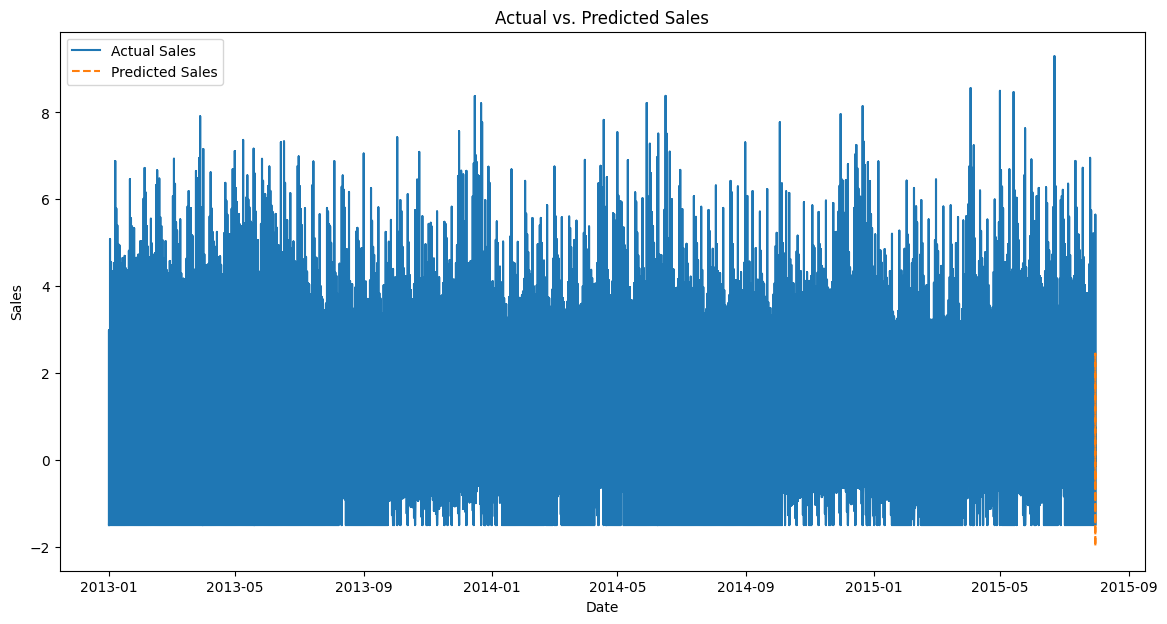

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(df.index, df['Predicted_Sales'], label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

In [32]:
# Ensure proper alignment and drop NaNs
actual_sales = df['Sales'].dropna()
predicted_sales = df['Predicted_Sales'].dropna()

# Align indexes
aligned_actual, aligned_predicted = actual_sales.align(predicted_sales, join='inner')

# Calculate evaluation metrics
mae = mean_absolute_error(aligned_actual, aligned_predicted)
rmse = np.sqrt(mean_squared_error(aligned_actual, aligned_predicted))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.0641865681300644
Root Mean Squared Error: 1.32219249933961
